# (Ford GoBike System Data Visualization)
## by (Hanan Alshehri)

## Investigation Overview

> In this investigation, my main interest in who/when/how long people want to use the Ford GoBike System.

## Dataset Overview

> San Francisco Ford GoBike , managed by Motivate, provides the Bay Area’s bike share system. Bikes can be unlocked from one station and returned to any other station in the system. People use bike share to commute to work or school, run errands, get to appointments, and more. The dataset includes 519700 trips and 13 variables which most of them are number value (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id and user_type).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('2017-fordgobike-tripdata.csv')

In [3]:
#First, I will take a copy of the data to clean them
df_copy = df.copy()

In [4]:
#Convert start_station_id, end_station_id, bike_id to String:
df_copy['start_station_id'] = df_copy['start_station_id'].astype(str)
df_copy['end_station_id'] = df_copy['end_station_id'].astype(str)
df_copy['bike_id'] = df_copy['bike_id'].astype(str)

#Convert start_time and end_time to Datetime:
df_copy['start_time'] = pd.to_datetime(df_copy['start_time'])
df_copy['end_time'] = pd.to_datetime(df_copy['end_time'])

In [5]:
#Extract start time month:
df_copy['month']=df_copy['start_time'].dt.strftime('%B')

#Extract start time day:
df_copy['day']=df_copy['start_time'].dt.strftime('%a')

## Distribution of Ford GoBike Users.

> Because one of the main feature(s) of our interest is user type; the majority of the users are 79% subscribers.

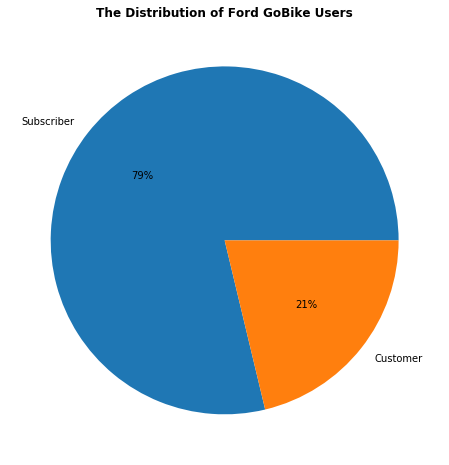

In [6]:
usercounts = df_copy['user_type'].value_counts()
pltlabels=usercounts.index

plt.figure(figsize=[10,8]) #To make a big plot
plt.pie(usercounts, labels=pltlabels, autopct='%1.0f%%') #Set "autopct" to show statistic
plt.title("The Distribution of Ford GoBike Users", fontsize=12, fontweight='semibold')
plt.show();

## Distribution of ride duration.

> The mean of trip duration looks like normally distributed, although the distribution is left-skewed(negatively skewed) before log transformation. After using it, the histogram indicates that the majority of rides from 500 to 1000 (600 is most) seconds long.

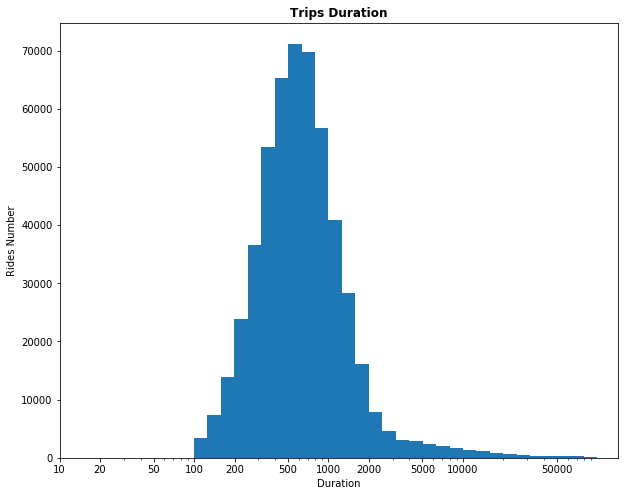

In [7]:
LogBins = 10**np.arange( 2 , 5+0.1 , 0.1)

#To make it readable:
xrange=[10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 50000]
xlabels = ['{}'.format(x) for x in xrange]

plt.figure(figsize=[10,8]) #To make a big plot
plt.hist(data=df_copy, x='duration_sec', bins=LogBins);

plt.xscale('log'); #Log transformation
plt.xticks(xrange,xlabels);

plt.title("Trips Duration", fontsize=12, fontweight='semibold')
plt.xlabel('Duration')
plt.ylabel('Rides Number')
plt.show();

## The most service months.

> The number of rides begins in June and continues upwards until October (The most number of bike rides is in October). After that, the frequency of the rides goes back down.

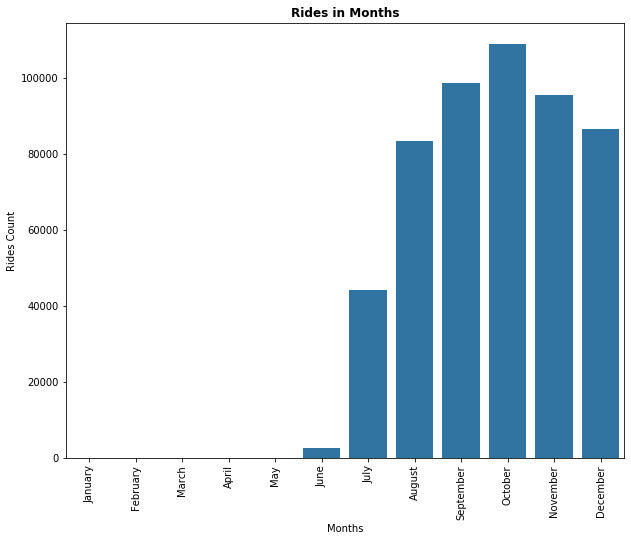

In [8]:
#Create two variables for month and user type
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
                 'September', 'October', 'November', 'December']

plt.figure(figsize=[10,8]) #To make a big plot
sb.countplot(data = df_copy, x='month', order=months, color=sb.color_palette()[0])

plt.title('Rides in Months', fontsize=12, fontweight='semibold')
plt.xlabel('Months')
plt.ylabel('Rides Count')
plt.xticks(rotation = 90) #For x-axis: to be clear
plt.show();

## The relationship between trip duration and seasons.

> I notice that the weather has an effect on the trip duration, so the bar chart demonstrates that most bikers like Summer so they take long rides in it more than in Fall or Winter.

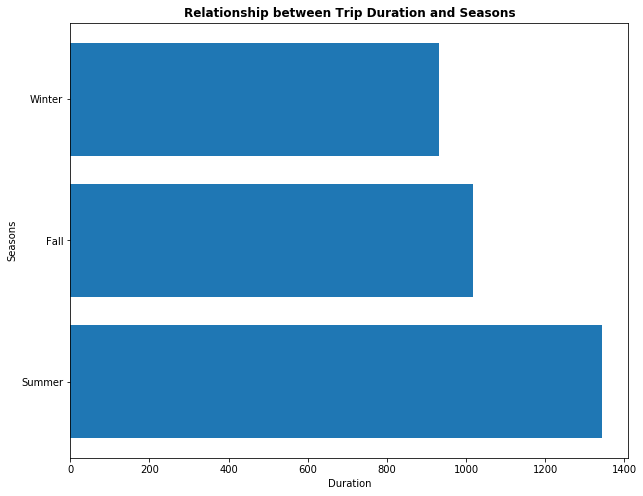

In [9]:
#First, I will create variables for seasons:
summer = df_copy.query('month in ["June" , "July" , "August"] ').duration_sec.mean() #take mean to make better visualization
fall = df_copy.query('month in ["September" , "November" , "December"] ').duration_sec.mean()
winter = df_copy.query('month in ["December" , "January" , "February"]' ).duration_sec.mean()
spring = df_copy.query('month in ["March" , "April" , "May"]' ).duration_sec.mean()

#Now make a plot:
plt.figure(figsize=[10,8]) #To make a big plot
plt.barh(['Summer','Fall','Winter','Spring'],[summer,fall,winter,spring])

plt.title("Relationship between Trip Duration and Seasons", fontsize=12, fontweight='semibold')
plt.xlabel("Duration")
plt.ylabel("Seasons")
plt.show();

## The length of ride for subscribers and customers.

> The customer through months or days has slightly longer trips than the subscriber (although both of them have a similar trend to their monthly usage).

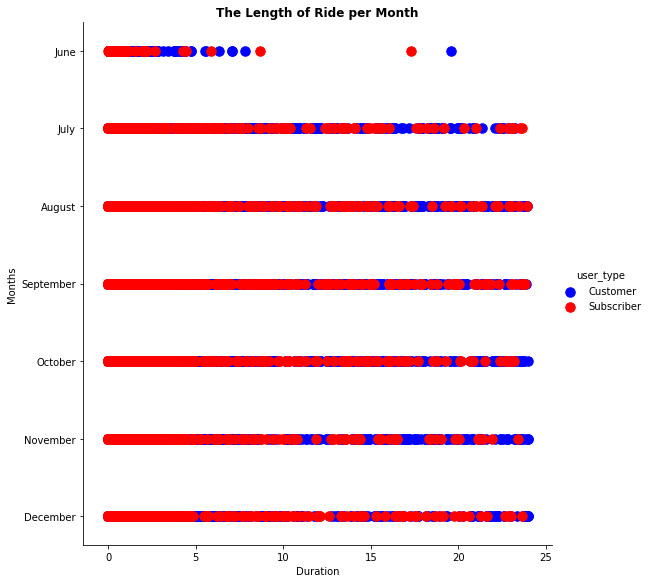

In [10]:
color={'color': ['b', 'r']} #To set color for plot
df_copy['duration_hours'] = df_copy['duration_sec'] / 3600 #I want it in hours

data=sb.FacetGrid(data=df_copy, hue='user_type', hue_kws=color, height=8)
data.map(plt.scatter,'duration_hours','month', s=90).add_legend(); #Use "add_legend()": to appear the labels
data.set_titles("{col_name}") #To set title for plots


plt.title('The Length of Ride per Month', fontsize=12, fontweight='semibold');
plt.ylabel("Months")
plt.xlabel("Duration")

plt.show();

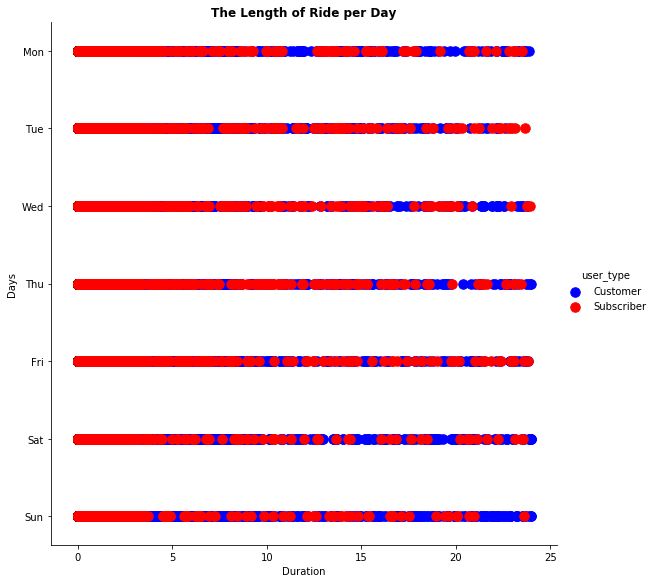

In [11]:
color={'color': ['b', 'r']} #To set color for plot
df_copy['duration_hours'] = df_copy['duration_sec'] / 3600 #I want it in hours

data=sb.FacetGrid(data=df_copy, hue='user_type', hue_kws=color, height=8)
data.map(plt.scatter,'duration_hours','day', s=90).add_legend(); #Use "add_legend()": to appear the labels
data.set_titles("{col_name}") #To set title for plots

plt.title('The Length of Ride per Day', fontsize=12, fontweight='semibold');
plt.ylabel("Days")
plt.xlabel("Duration")

plt.show();

## The daily usage for customers and subscribers.

> The earlier relationships that were observed: "This Time is for Bike!". Interestingly, most customers use GoBike on the weekends, while most subscribers ride it from Monday to Friday.

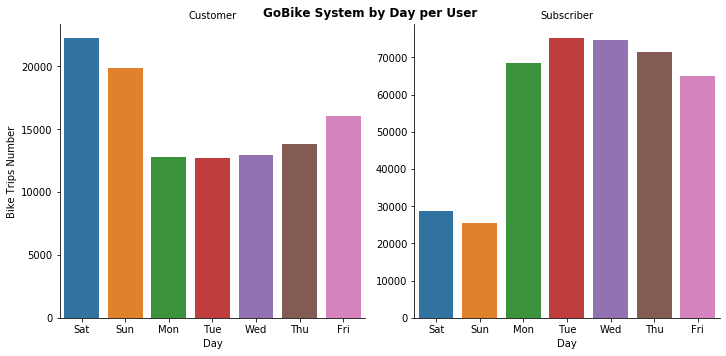

In [12]:
days = ['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']

data = sb.catplot(data=df_copy, x='day', col="user_type", kind='count', sharey=False, order=days) #Set "sharey" to false be more accurate
data.set_axis_labels("Day", "Bike Trips Number")
data.set_titles("{col_name}") #To set title for plots

data.fig.suptitle('GoBike System by Day per User', fontsize=12, fontweight='semibold');

In [15]:
!jupyter nbconvert Ford_GoBike_System_Part2.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Ford_GoBike_System_Part2.ipynb to slides
[NbConvertApp] Writing 477539 bytes to Ford_GoBike_System_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\newDe\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\newDe\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\newDe\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\newDe\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\Users\newDe\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filena